# sampleSortCuda using Thicket

In [83]:
import sys
sys.path.append("/scratch/group/csce435-f23/python-3.8.17/lib/python3.8/site-packages")
sys.path.append("/scratch/group/csce435-f23/thicket")
from glob import glob

import matplotlib.pyplot as plt
import pandas as pd

import thicket as th

pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)

Read in all the files

In [84]:
tk = th.Thicket.from_caliperreader(glob("cali_files/*Random.cali"))

In [85]:
# Performance data
tk.dataframe

nid  \
node                                              profile           
{'name': 'main', 'type': 'function'}              124491875     1   
                                                  195752253     1   
                                                  464547195     1   
                                                  509497535     1   
                                                  533076890     1   
                                                  550648611     1   
                                                  560889437     1   
                                                  694408594     1   
                                                  703461264     1   
                                                  902646253     1   
                                                  1028930069    1   
                                                  1149987369    1   
                                                  1195390650    1   
                                                  1607404934    1   
                                                  1671635811    1   
                                                  1688738091    1   
                                                  1717026058    1   
                                                  1812237116    1   
                                                  1834528091    1   
                                                  2032205117    1   
                                                  2090964466    1   
                                                  2347989821    1   
                                                  2464758659    1   
                                                  2488064882    1   
                                                  2659917106    1   
                                                  2784566003    1   
                                                  3102904775    1   
                                                  3176054113    1   
                                                  3444916112    1   
                                                  3531389488    1   
                                                  3604347521    1   
                                                  3613556635    1   
                                                  4001119927    1   
                                                  4017033035    1   
                                                  4231381277    1   
{'name': 'comm', 'type': 'function'}              124491875     3   
                                                  195752253     3   
                                                  464547195     3   
                                                  509497535     3   
                                                  533076890     3   
                                                  550648611     3   
                                                  560889437     3   
                                                  694408594     3   
                                                  703461264     3   
                                                  902646253     3   
                                                  1028930069    3   
                                                  1149987369    3   
                                                  1195390650    3   
                                                  1607404934    3   
                                                  1671635811    3   
                                                  1688738091    3   
                                                  1717026058    3   
                                                  1812237116    3   
                                                  1834528091    3   
                                                  2032205117    3   
                                                  2090964466    3   
                                                  2347989821

In [86]:
tk.metadata

,cali.caliper.version,spot.metrics,spot.timeseries.metrics,spot.format.version,spot.options,spot.channels,cali.channel,spot:cuda.gputime,spot:node.order,spot:output,launchdate,libraries,cmdline,cluster,Algorithm,ProgrammingModel,Datatype,SizeOfDatatype,InputSize,InputType,num_threads,num_blocks,group_num,implementation_source
profile,,,,,,,,,,,,,,,,,,,,,,,,
124491875,2.11.0-dev,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"cuda.gputime,node.order",regionprofile,spot,true,true,cali_files/sampleSortCUDA-256-268435456-Random...,1700107605,[/scratch/group/csce435-f23/Caliper/caliper/li...,"[./sampleSortCUDA, 256, 268435456, Random]",g,SampleSort,CUDA,float,4,268435456,Random,256,1048576,6,AI+Handwritten
195752253,2.11.0-dev,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"cuda.gputime,node.order",regionprofile,spot,true,true,cali_files/sampleSortCUDA-512-1048576-Random.cali,1700107532,[/scratch/group/csce435-f23/Caliper/caliper/li...,"[./sampleSortCUDA, 512, 1048576, Random]",g,SampleSort,CUDA,float,4,1048576,Random,512,2048,6,AI+Handwritten
464547195,2.11.0-dev,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"cuda.gputime,node.order",regionprofile,spot,true,true,cali_files/sampleSortCUDA-64-4194304-Random.cali,1700107554,[/scratch/group/csce435-f23/Caliper/caliper/li...,"[./sampleSortCUDA, 64, 4194304, Random]",g,SampleSort,CUDA,float,4,4194304,Random,64,65536,6,AI+Handwritten
509497535,2.11.0-dev,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"cuda.gputime,node.order",regionprofile,spot,true,true,cali_files/sampleSortCUDA-1024-268435456-Rando...,1700107616,[/scratch/group/csce435-f23/Caliper/caliper/li...,"[./sampleSortCUDA, 1024, 268435456, Random]",g,SampleSort,CUDA,float,4,268435456,Random,1024,262144,6,AI+Handwritten
533076890,2.11.0-dev,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"cuda.gputime,node.order",regionprofile,spot,true,true,cali_files/sampleSortCUDA-64-1048576-Random.cali,1700107509,[/scratch/group/csce435-f23/Caliper/caliper/li...,"[./sampleSortCUDA, 64, 1048576, Random]",g,SampleSort,CUDA,float,4,1048576,Random,64,16384,6,AI+Handwritten
550648611,2.11.0-dev,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"cuda.gputime,node.order",regionprofile,spot,true,true,cali_files/sampleSortCUDA-64-16777216-Random.cali,1700107554,[/scratch/group/csce435-f23/Caliper/caliper/li...,"[./sampleSortCUDA, 64, 16777216, Random]",g,SampleSort,CUDA,float,4,16777216,Random,64,262144,6,AI+Handwritten
560889437,2.11.0-dev,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"cuda.gputime,node.order",regionprofile,spot,true,true,cali_files/sampleSortCUDA-256-65536-Random.cali,1700107473,[/scratch/group/csce435-f23/Caliper/caliper/li...,"[./sampleSortCUDA, 256, 65536, Random]",g,SampleSort,CUDA,float,4,65536,Random,256,256,6,AI+Handwritten
694408594,2.11.0-dev,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"cuda.gputime,node.order",regionprofile,spot,true,true,cali_files/sampleSortCUDA-512-4194304-Random.cali,1700107554,[/scratch/group/csce435-f23/Caliper/caliper/li...,"[./sampleSortCUDA, 512, 4194304, Random]",g,SampleSort,CUDA,float,4,4194304,Random,512,8192,6,AI+Handwritten
703461264,2.11.0-dev,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"cuda.gputime,node.order",regionprofile,spot,true,true,cali_files/sampleSortCUDA-128-1048576-Random.cali,1700107532,[/scratch/group/csce435-f23/Caliper/caliper/li...,"[./sampleSortCUDA, 128, 1048576, Random]",g,SampleSort,CUDA,float,4,1048576,Random,128,8192,6,AI+Handwritten


In [87]:
gb = tk.groupby("InputSize")

7  thickets created...
{65536: <thicket.thicket.Thicket object at 0x2ae09a291a00>, 262144: <thicket.thicket.Thicket object at 0x2ae09a2f7f40>, 1048576: <thicket.thicket.Thicket object at 0x2ae099c5fa30>, 4194304: <thicket.thicket.Thicket object at 0x2ae099cfca90>, 16777216: <thicket.thicket.Thicket object at 0x2ae099dab910>, 67108864: <thicket.thicket.Thicket object at 0x2ae099f9b520>, 268435456: <thicket.thicket.Thicket object at 0x2ae09a365100>}


In [137]:
ctk = th.Thicket.concat_thickets(
    thickets=list(gb.values()),
    headers=list(gb.keys()),
    axis="columns",
    metadata_key="num_threads"
)

In [138]:
ctk.dataframe

65536  \
                                                                nid   
node                                              num_threads         
{'name': 'main', 'type': 'function'}              64              1   
                                                  128             1   
                                                  256             1   
                                                  512             1   
                                                  1024            1   
{'name': 'comm', 'type': 'function'}              64              3   
                                                  128             3   
                                                  256             3   
                                                  512             3   
                                                  1024            3   
{'name': 'comm_large', 'type': 'function'}        64              4   
                                                  128             4   
                                                  256             4   
                                                  512             4   
                                                  1024            4   
{'name': 'cudaMemcpy', 'type': 'function'}        64              5   
                                                  128             5   
                                                  256             5   
                                                  512             5   
                                                  1024            5   
{'name': 'comm_small', 'type': 'function'}        64              8   
                                                  128             8   
                                                  256             8   
                                                  512             8   
                                                  1024            8   
{'name': 'cudaMemcpy', 'type': 'function'}        64              9   
                                                  128             9   
                                                  256             9   
                                                  512             9   
                                                  1024            9   
{'name': 'comp', 'type': 'function'}              64              6   
                                                  128             6   
                                                  256             6   
                                                  512             6   
                                                  1024            6   
{'name': 'comp_large', 'type': 'function'}        64              7   
                                                  128             7   
                                                  256             7   
                                                  512             7   
                                                  1024            7   
{'name': 'comp_small', 'type': 'function'}        64             10   
                                                  128            10   
                                                  256            10   
                                                  512            10   
                                                  1024           10   
{'name': 'correctness_check', 'type': 'function'} 64             11   
                                                  128            11   
                                                  256            11   
                                                  512            11   
                                                  1024           11   
{'name': 'data_init', 'type': 'function'}         64              2   
                                                  128             2   
                                                  256             2   
                                                  512             2   
               

Perform pandas operations to get the table in a desirable format for plotting

In [139]:
# Drop unwanted columns
ctk.dataframe = ctk.dataframe.reset_index().drop(["nid", "spot.channel", "Min time/rank", "Max time/rank", "Avg time/rank", "Avg GPU time/rank", "Min GPU time/rank", "Max GPU time/rank", "Total GPU time"], level=1, axis=1)
ctk.dataframe = ctk.dataframe.drop(("node", ""), axis=1)

# Rename index
ctk.dataframe = ctk.dataframe.rename({("name", ""): "name", ("num_threads", ""): "num_threads"}).set_index(["name", "num_threads"])

In [140]:
ctk.dataframe

65536     262144    1048576    4194304  \
                              Total time Total time Total time Total time   
name              num_threads                                               
main              64            1.368327   1.105602   2.487538   1.585880   
                  128           0.780743   1.240765   1.657101   4.745453   
                  256           0.655044   1.148136   1.597480   3.235936   
                  512           0.762344   1.157262   1.181476   2.104805   
                  1024          0.979782   1.057904   2.421406   1.134141   
comm              64            0.000463   0.000991   0.003026   0.013286   
                  128           0.001375   0.000969   0.003402   0.013443   
                  256           0.000762   0.000981   0.003357   0.013259   
                  512           0.000539   0.001939   0.003542   0.013317   
                  1024          0.000467   0.001281   0.004195   0.009213   
comm_large        64            0.000163   0.000329   0.001016   0.008965   
                  128           0.000261   0.000335   0.001580   0.009005   
                  256           0.000262   0.000327   0.001585   0.008990   
                  512           0.000236   0.000618   0.001568   0.008957   
                  1024          0.000233   0.000727   0.001602   0.008977   
cudaMemcpy        64            0.000133   0.000291   0.000979   0.008927   
                  128           0.000225   0.000301   0.001538   0.008965   
                  256           0.000227   0.000289   0.001550   0.008952   
                  512           0.000203   0.000582   0.001525   0.008910   
                  1024          0.000202   0.000683   0.001557   0.008925   
comm_small        64            0.000198   0.000553   0.001909   0.004183   
                  128           0.001014   0.000527   0.001691   0.004321   
                  256           0.000391   0.000546   0.001652   0.004159   
                  512           0.000202   0.001215   0.001842   0.004235   
                  1024          0.000134   0.000419   0.002458   0.000110   
cudaMemcpy        64            0.000154   0.000502   0.001857   0.004129   
                  128           0.000967   0.000482   0.001634   0.004258   
                  256           0.000341   0.000495   0.001600   0.004107   
                  512           0.000153   0.001163   0.001785   0.004176   
                  1024          0.000092   0.000368   0.002393   0.000059   
comp              64            0.010402   0.095291   1.453994   0.480528   
                  128           0.006700   0.039142   0.470681   3.400765   
                  256           0.009430   0.024824   0.221742   1.714477   
                  512           0.002404   0.040763   0.108408   0.743946   
                  1024          0.000882   0.009011   0.175249   0.202128   
comp_large        64            0.001017   0.000221   0.000226   0.000334   
                  128           0.000287   0.000223   0.000247   0.000299   
                  256           0.000511   0.000224   0.000207   0.000269   
                  512           0.000448   0.000254   0.000247   0.000307   
                  1024          0.000430   0.000565   0.000342   0.000175   
comp_small        64            0.009311   0.094976   1.453650   0.480084   
                  128           0.006333   0.038840   0.470325   3.400313   
                  256           0.008836   0.024508   0.221449   1.714091   
                  512           0.001877   0.040426   0.108064   0.743520   
                  1024          0.000384   0.008357   0.174808   0.201818   
correctness_check 64            0.000256   0.000300   0.000340   0.000348   
                  128           0.000430   0.000233   0.000325   0.000283   
                  256           0.000439   0.000245   0.000273   0.000287   
                  512           0.000379   0.001531   0.000340   0.000291   
                  1024         

In [141]:
# Define common variables
function_names = set(ctk.dataframe.index.get_level_values("name"))
threads = sorted(list(set(ctk.dataframe.index.get_level_values("num_threads"))))
matrix_sizes = ctk.dataframe.columns.tolist()

# Plotting

Use `matplotlib.pyplot` directly for more fine-grained control. Specifically for our case we can change the x axis scaling from base 10 to base 2.

In [149]:
def plot_mpl(df, title, xlabel, ylabel):
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    ax.plot(
        df,
        marker='o',
    )
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.legend(matrix_sizes)
    plt.grid(True)
    #plt.yscale("log", base=10)
    plt.xscale("log", base=2)
    plt.xticks(threads)
    plt.show()
    return fig, ax

In [144]:
ctk.dataframe.loc["main"]

,65536,262144,1048576,4194304,16777216,67108864,268435456
,Total time,Total time,Total time,Total time,Total time,Total time,Total time
num_threads,,,,,,,
64,1.368327,1.105602,2.487538,1.585880,3.890383,5.008044,17.072618
128,0.780743,1.240765,1.657101,4.745453,3.662863,4.615831,17.120682
256,0.655044,1.148136,1.597480,3.235936,1.619473,4.851869,17.495315
512,0.762344,1.157262,1.181476,2.104805,4.829209,4.809631,18.369061
1024,0.979782,1.057904,2.421406,1.134141,3.360816,4.556020,18.870632


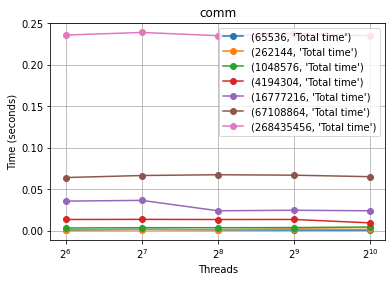

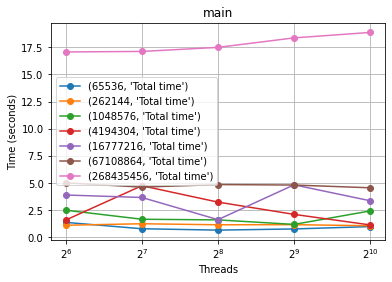

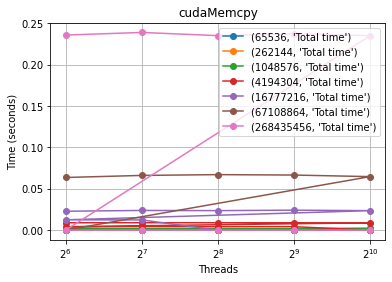

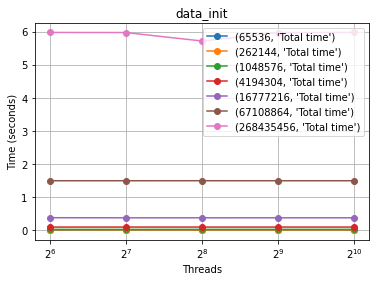

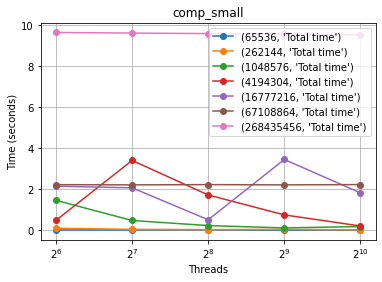

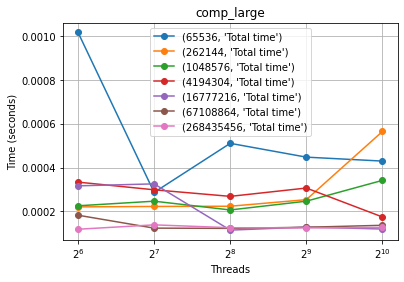

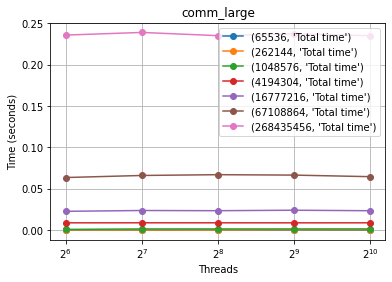

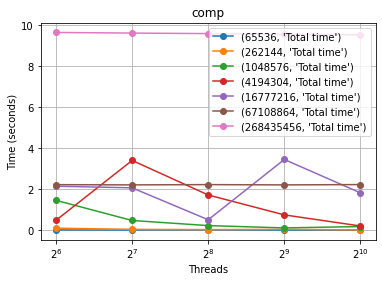

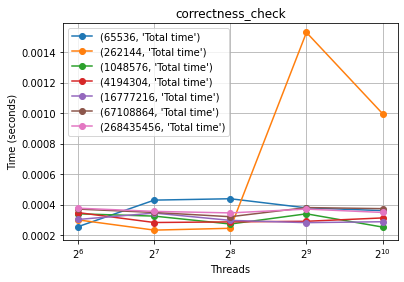

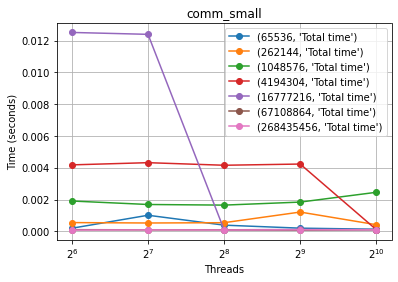

In [150]:
for name in function_names:
    plot_mpl(
        df=ctk.dataframe.loc[name],
        title=name,
        xlabel="Threads",
        ylabel="Time (seconds)",
    )
    #
    #
    #
    #